In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize

Text(0, 0.5, 'Microchip test 2')

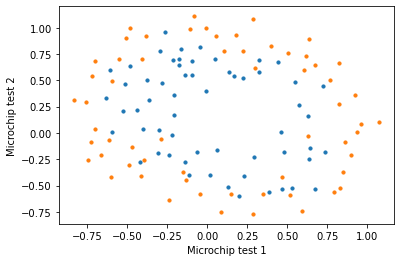

In [2]:
data = pd.read_csv('ex2data2.txt', header=None)

X = data.values[:, 0:2]
y = data.values[:, 2]

addmited = data.loc[y==1]
not_addmited = data.loc[y==0]

plt.scatter(addmited.iloc[:, 0], addmited.iloc[:, 1], s=10, label='Addmited')
plt.scatter(not_addmited.iloc[:, 0], not_addmited.iloc[:, 1], s=10, label="Not addmited")
plt.xlabel('Microchip test 1')
plt.ylabel('Microchip test 2')

In [3]:
def map_feature(x1, x2):
    x1 = x1.reshape((x1.size, 1))
    x2 = x2.reshape((x2.size, 1))
    
    degree = 6
    out = np.ones((x1.size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

In [4]:
m, n = X.shape
y = y[:, np.newaxis]
it = map_feature(X[:, 0], X[:, 1])

In [5]:
it.shape

(118, 28)

In [6]:
it

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def computeCost(theta, x, y, lamb):
    z = x @ theta
    h = sigmoid(z)
    J = (1 / y.size) * sum(-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h)) + (lamb / y.size) * sum(theta[1:theta.size] ** 2)
    return J

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    return (1 / y.size) * np.dot(x.T, sigmoid(x@theta) - y)

def gradient_descent(theta, x, y, lamb, lr, iters):
    J_his = []

    for iter in range(iters):
        z = x @ theta
        h = sigmoid(z)
        cost_his = computeCost(theta, x, y, lamb)
        J_his.append(cost_his)
        theta = theta - (lr * gradient(theta, x, y))
        theta[1:theta.size, :] = theta[1:theta.size, :] - (((lr * lamb) / y.size) * theta[1:theta.size])

    return theta, J_his

In [8]:
init_theta = np.zeros((it.shape[1], 1))
#cost = computeCost(init_theta, it, y, 1)
print(it.shape, init_theta.shape)

(118, 28) (28, 1)


In [9]:
cost = computeCost(init_theta, it, y, 1)
cost

array([0.69314718])

In [10]:
theta_new, cost_histo = gradient_descent(init_theta, it, y, 1, 0.004, 1000000)

In [11]:
cost_histo[-1]

array([0.59554369])

In [12]:
theta_new.shape

(28, 1)

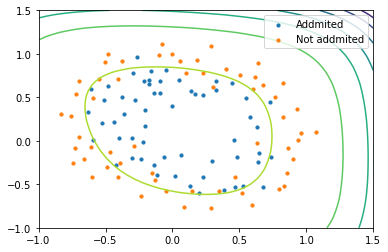

In [13]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i, j] = (map_feature(np.array(u[i]), np.array(v[j])).dot(np.array(theta_new)))

z = z.T
plt.contour(u, v, z)
plt.scatter(addmited.iloc[:, 0], addmited.iloc[:, 1], s=10, label='Addmited')
plt.scatter(not_addmited.iloc[:, 0], not_addmited.iloc[:, 1], s=10, label="Not addmited")
plt.legend()

In [14]:
def predict(theta, x):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m, n = x.shape
    p = np.zeros(shape=(m, 1))

    h = sigmoid(x.dot(theta))

    for it in range(0, h.shape[0]):
        if h[it] > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p


#% Compute accuracy on our training set
p = predict(np.array(theta_new), it)
print ('Train Accuracy: %f' % ((y[np.where(p == y)].size / float(y.size)) * 100.0))


Train Accuracy: 83.050847
